# IBM HR Analytics Project Exercise

## 📘 Latar Belakang
Perusahaan tempat kamu bekerja sedang mengalami tingkat turnover karyawan yang cukup tinggi. Tim Human Resources (HR) ingin memahami lebih jauh faktor-faktor yang berkontribusi terhadap tingginya angka *attrition* (resign) di antara karyawan. Mereka ingin menggunakan data yang dimiliki untuk:

1. Mengetahui pola dan perbedaan antara karyawan yang bertahan dan yang keluar.
2. Mengidentifikasi variabel-variabel penting yang memengaruhi keputusan resign.
3. Membuat kebijakan berbasis data untuk meningkatkan retensi dan kepuasan kerja.

Sebagai seorang **Data Analyst**, kamu diminta untuk melakukan analisis statistik dan eksplorasi visual dari data HR perusahaan.


## 🎯 Tujuan Exercise
Kamu akan mengerjakan beberapa studi kasus yang saling berkaitan dan mengarah pada pemahaman menyeluruh mengenai fenomena *employee attrition*. Untuk setiap studi kasus, kamu akan:

1. Menentukan metode uji statistik yang tepat.
2. Memilih jenis visualisasi yang relevan.
3. Menginterpretasikan hasil uji dan visualisasi.
4. Menyampaikan insight bisnis yang informatif dan actionable.


## 📁 Dataset
Dataset yang digunakan adalah: `IBM HR Analytics Employee Attrition & Performance`

Jika belum tersedia, kamu dapat mengunduhnya dari Kaggle: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


## 🧹 Persiapan Data

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Cek struktur data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## 🔍 Studi Kasus 1: Gaji dan Attrition
### Pertanyaan:
> Apakah terdapat perbedaan rata-rata gaji bulanan antara karyawan yang keluar (Attrition = Yes) dan yang bertahan (Attrition = No)?

### Tugas:
- Tentukan metode uji statistik yang tepat.
- Buat visualisasi yang menunjukkan perbandingan distribusi gaji antar dua grup.
- Interpretasikan hasil uji dan grafik.
- Berikan insight bisnis dari temuanmu.


- H0: rata rata gaji bulanan karyawan keluar = karywan bertahan
- H1: rata rata gaji bulanan karyawan keluar != karywan bertahan

In [3]:
yes = df[df['Attrition'] == 'Yes']['MonthlyIncome']
no = df[df['Attrition'] == 'No']['MonthlyIncome']

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

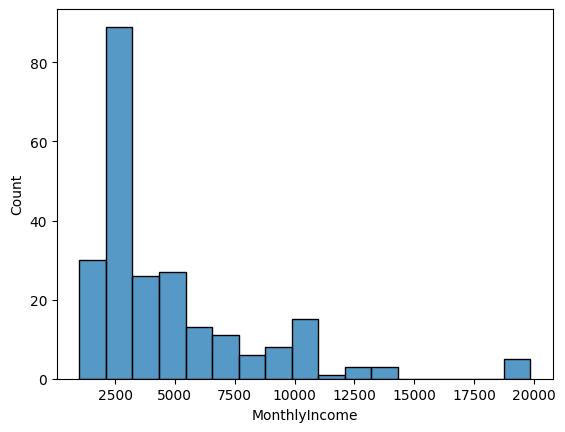

In [ ]:
sns.histplot(yes)

Data Tidak Normal Maka Pakai Mann Whitney

In [6]:
from scipy.stats import mannwhitneyu

In [7]:
# uji statistik (2 tail)
stats, p_value = mannwhitneyu(yes, no)

In [8]:
# Intepretasi hasil:
if p_value > 0.05:
    print(f'p_value = {p_value:.2f}, Terima H0')
else:
    print(f'p_value = {p_value:.2f}, Terima H1')

p_value = 0.00, Terima H1


**Kesimpulan:** ada perbedaan rata-rata gaji bulanan antara karyawan yang keluar (Attrition = Yes) dan yang bertahan (Attrition = No)

C:\Users\ahmad\AppData\Local\Temp\ipykernel_25460\3206473212.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='Set2')


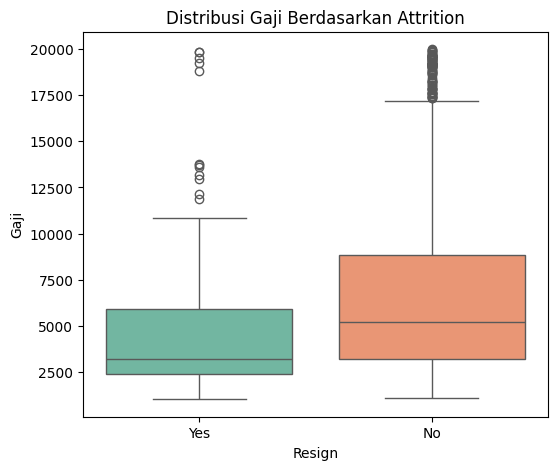

In [43]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='Set2')
plt.title('Distribusi Gaji Berdasarkan Attrition')
plt.xlabel('Resign')
plt.ylabel('Gaji')
plt.show()

In [ ]:
summary = df.groupby('Attrition')['MonthlyIncome'].describe()
summary

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,6832.739659,4818.208001,1051.0,3211.0,5204.0,8834.0,19999.0
Yes,237.0,4787.092827,3640.210367,1009.0,2373.0,3202.0,5916.0,19859.0


**Insight:** 
- Mayoritas karyawan resign gajinya lebih rendah dari yang bertahan
- Jumlah outlier di Attrition = No (Bertahan) lebih banyak & gaji tinggi
- Sebaran data "Yes" lebih terkonsentrasi di gaji rendah

## 🔍 Studi Kasus 2: Gender dan Resign
### Pertanyaan:
> Apakah gender memiliki pengaruh terhadap kemungkinan resign?

### Tugas:
- Tentukan metode uji statistik yang sesuai.
- Buat visualisasi proporsi attrition berdasarkan gender.
- Interpretasi dan insight yang bisa disampaikan.


- H0: Gender tidak memiliki pengaruh terhadap kemungkinan resign
- H1: Gender memiliki pengaruh terhadap kemungkinan resign

In [ ]:
# tabel cross tabulasi 
resign_by_gender = pd.crosstab(df['Attrition'], df['Gender'])
resign_by_gender

Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


In [11]:
from scipy.stats import chi2_contingency

In [12]:
# uji statistik
stats, p_value, dof, expected = chi2_contingency(resign_by_gender)

In [13]:
# Intepretasi hasil:
if p_value > 0.05:
    print(f'p_value = {p_value:.2f}, Terima H0')
else:
    print(f'p_value = {p_value:.2f}, Terima H1')

p_value = 0.29, Terima H0


**Kesimpulan:** Gender tidak memiliki pengaruh terhadap kemungkinan resign

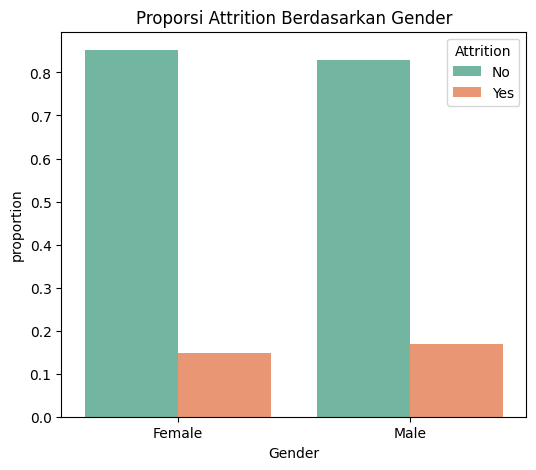

In [45]:
# Hitung proporsi Attrition per Gender
attrition_gender = df.groupby('Gender')['Attrition'].value_counts(normalize=True).rename('proportion').reset_index()

# Plot
plt.figure(figsize=(6,5))
sns.barplot(data=attrition_gender, x='Gender', y='proportion', hue='Attrition', palette='Set2')
plt.title('Proporsi Attrition Berdasarkan Gender')
plt.show()

**Insight:** 
- Proporsi Attrition “Yes” (Resign) antara Female dan Male hampir sama
- Tidak ada perbedaan visual yang mencolok antara gender
- Secara visual, Gender tidak menunjukkan pola khusus terhadap kemungkinan resign

## 🔍 Studi Kasus 3: Job Satisfaction Antar Departemen
### Pertanyaan:
> Apakah terdapat perbedaan tingkat kepuasan kerja antar departemen?

### Tugas:
- Tentukan uji statistik yang digunakan.
- Buat grafik yang membandingkan distribusi JobSatisfaction antar Department.
- Interpretasi hasil uji dan insight yang relevan.


- H0: Tidak terdapat perbedaan tingkat kepuasan kerja antar departemen
- H1: Terdapat perbedaan tingkat kepuasan kerja antar departemen

In [17]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [18]:
df['JobSatisfaction'].unique()

array([4, 2, 3, 1])

In [21]:
# data umur setiap kelas
Sales = df[df['Department'] == 'Sales']['JobSatisfaction']
RnD  = df[df['Department'] == 'Research & Development']['JobSatisfaction']
HR = df[df['Department'] == 'Human Resources']['JobSatisfaction']

<Axes: xlabel='JobSatisfaction', ylabel='Count'>

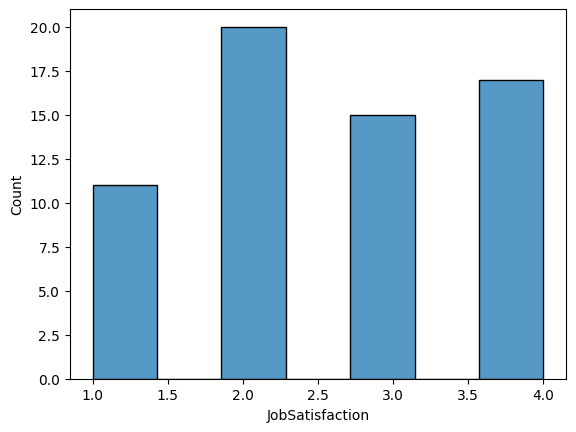

In [25]:
sns.histplot(HR)

Data Tidak Normal Maka Pakai Kruskal

In [26]:
from scipy.stats import kruskal

In [27]:
# uji statistik
stats, p_value = kruskal(Sales, RnD, HR)

In [28]:
# Intepretasi hasil:
if p_value > 0.05:
    print(f'p_value = {p_value:.2f}, Terima H0')
else:
    print(f'p_value = {p_value:.2f}, Terima H1')

p_value = 0.55, Terima H0


**Kesimpulan:** Tidak terdapat perbedaan tingkat kepuasan kerja antar departemen

C:\Users\ahmad\AppData\Local\Temp\ipykernel_25460\3888582741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Department', y='JobSatisfaction', palette='Set2')


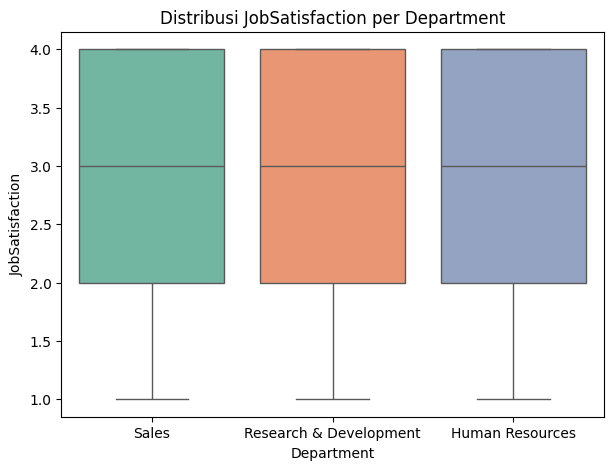

In [46]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='Department', y='JobSatisfaction', palette='Set2')
plt.title('Distribusi JobSatisfaction per Department')
plt.show()

**Insight:** 
- Tingkat kepuasan kerja antar departemen terlihat seragam
- Tidak ada departemen yang secara visual dominan lebih puas atau lebih tidak puas
- Penyebaran skor JobSatisfaction (dari 1–4) di tiap departemen relatif sama

## 🔍 Studi Kasus 4: Jarak Rumah dan Attrition
### Pertanyaan:
> Apakah terdapat hubungan antara jarak dari rumah ke kantor dan kemungkinan resign?

### Tugas:
- Pilih metode korelasi yang tepat.
- Buat scatter plot antara DistanceFromHome dan Attrition.
- Interpretasi kekuatan dan arah hubungan.
- Insight operasional dari temuan.


- H0: Tidak terdapat hubungan antara jarak dari rumah ke kantor dan kemungkinan resign
- H1: Terdapat hubungan antara jarak dari rumah ke kantor dan kemungkinan resign

**Kesimpulan:**

## 🔍 Studi Kasus 5: Visualisasi Korelasi
### Pertanyaan:
> Faktor apa saja yang paling berkaitan dengan attrition?

### Tugas:
- Buat visualisasi heatmap korelasi antar variabel numerik.
- Interpretasikan korelasi dengan attrition (ubah menjadi 0/1 jika perlu).
- Buat insight menyeluruh untuk manajemen HR.


In [31]:
# ubah Attrition ke numerik dulu
df['AttritionBinary'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [32]:
# hitung korelasi antar variabel numerik
num_col = df.select_dtypes(include=['int64', 'float64'])

In [33]:
# Pearson 
corr = num_col.corr()

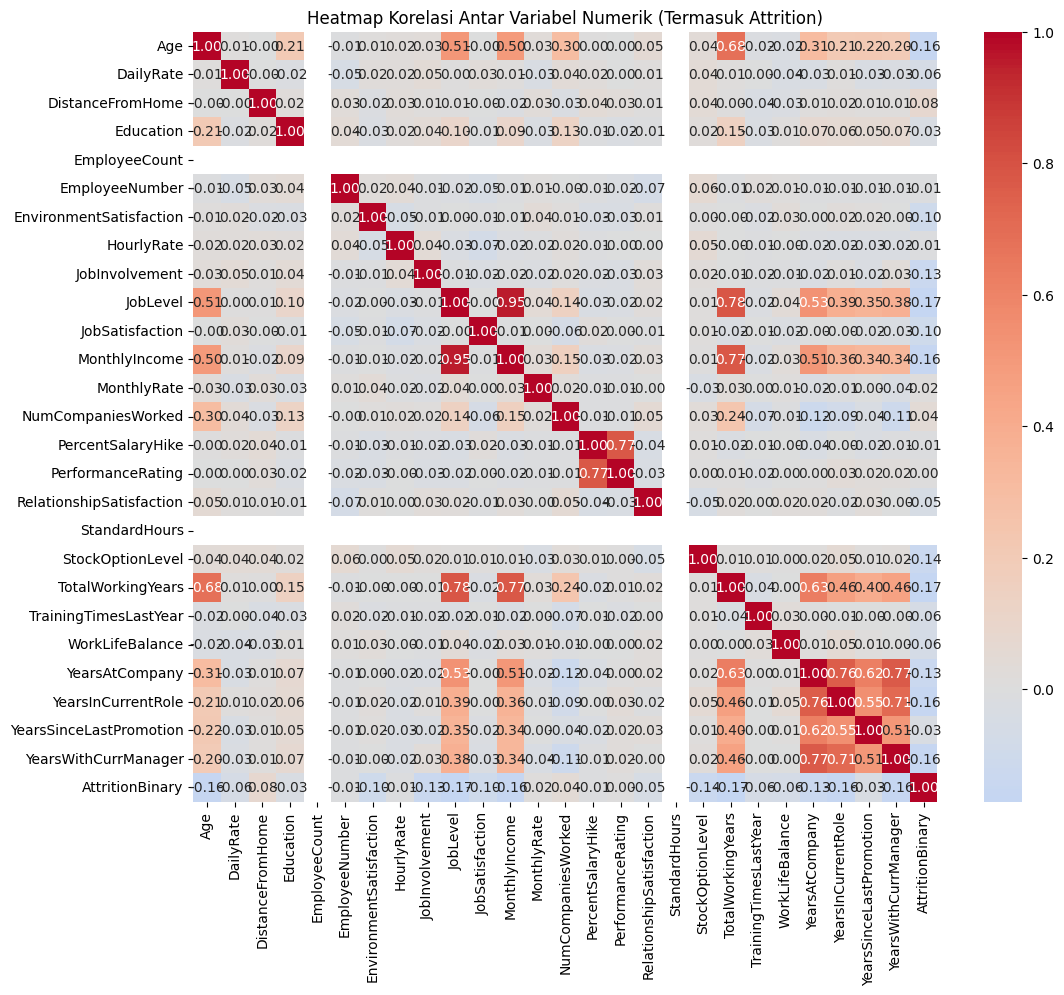

In [35]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi Antar Variabel Numerik (Termasuk Attrition)')
plt.show()

In [39]:
corr_attrition = corr['AttritionBinary'].sort_values(key=abs, ascending=False).reset_index()
corr_attrition

,index,AttritionBinary
0,AttritionBinary,1.000000
1,TotalWorkingYears,-0.171063
2,JobLevel,-0.169105
3,YearsInCurrentRole,-0.160545
4,MonthlyIncome,-0.159840
5,Age,-0.159205
6,YearsWithCurrManager,-0.156199
7,StockOptionLevel,-0.137145
8,YearsAtCompany,-0.134392
9,JobInvolvement,-0.130016


**Isight:**
1. Faktor dominan penyebab attrition adalah:
- Gaji rendah (MonthlyIncome)
- Jabatan rendah (JobLevel)
- Masa kerja yang masih singkat (YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager)
- Karyawan muda (Age)
2. DistanceFromHome memiliki korelasi positif, meski lemah, artinya jarak tetap faktor risiko resign
3. WorkLifeBalance, JobSatisfaction, EnvironmentSatisfaction ada pengaruh, tapi lebih lemah korelasinya
4. Variabel EmployeeCount dan StandardHours tidak berguna (korelasinya NaN), karena nilainya seragam (constant)

## 🧠 Ringkasan Akhir
Tuliskan ringkasan insight dan rekomendasi strategis untuk HR berdasarkan seluruh hasil analisis. Susun dalam bentuk executive summary maksimal 1 halaman.

> 📌 *Catatan: Kerjakan setiap studi kasus dalam urutan yang diberikan. Fokus pada metode, interpretasi, dan insight yang bisa dikaitkan dengan konteks bisnis.*
